In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from keras.layers import *
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.math import l2_normalize
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from gensim.models import KeyedVectors
from keras import layers

In [ ]:
!wget -P download -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
word2vec = KeyedVectors.load_word2vec_format('download/GoogleNews-vectors-negative300.bin.gz', binary=True)

--2020-12-02 07:18:26--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.101.254
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.101.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘download/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  69.7MB/s    in 25s     

2020-12-02 07:18:51 (64.0 MB/s) - ‘download/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
(xtrain,ytrain),(xtest,ytest)=imdb.load_data(num_words=5000) 

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
maxlen=500
vocab_size=5000
emb_dimension=300
xtrain=pad_sequences(xtrain,maxlen=maxlen,padding='post')
xtest=pad_sequences(xtest,maxlen=maxlen,padding='post')

In [ ]:
word_idx=imdb.get_word_index() #getting vocab from imdb data

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
embedding_matrix = np.zeros((vocab_size,emb_dimension))
for word, i in word_idx.items():
    if word in word2vec.vocab and i<vocab_size:
        embedding_matrix[i] = word2vec.word_vec(word)

In [ ]:
input=Input(shape=(maxlen,))
emb=Embedding(vocab_size,emb_dimension,weights=[embedding_matrix])(input)
x=Bidirectional(keras.layers.GRU(256, return_sequences=True))(emb)
x=Conv1D(256,kernel_size=5,activation='relu')(x)  
#x=Dropout(0.5)(x)
x= MaxPool1D()(x)
#x=LSTM(128,kernel_regularizer=keras.regularizers.L2(l2=0.01))(x) #l2=0.001
x=Dense(80,activation='relu')(x)
x=Dense(1,activation='sigmoid')(x)
model=Model(inputs=input,outputs=x)
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 300)          1500000   
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 512)          857088    
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 256)          655616    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 248, 256)          0         
_________________________________________________________________
dense (Dense)                (None, 248, 80)           20560     
_________________________________________________________________
dense_1 (Dense)              (None, 248, 1)           

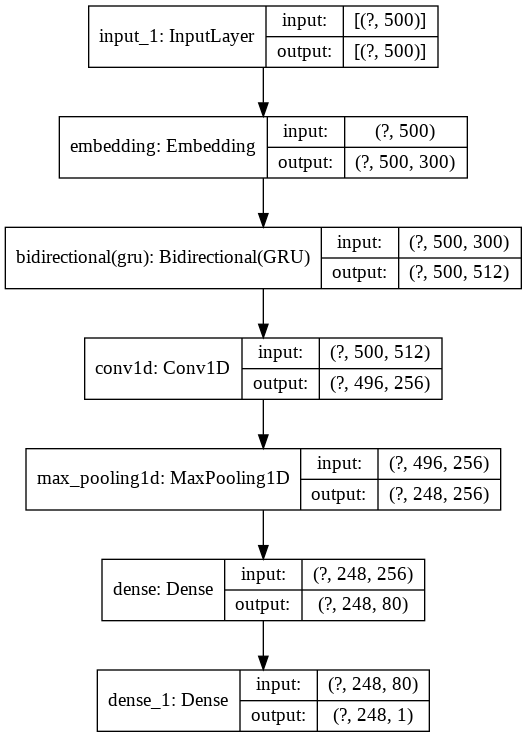

In [ ]:
plot_model(model, show_shapes=True, to_file='BiGRU_CNN_maxpool.png')

In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(xtrain, ytrain, batch_size=256, epochs=10, validation_data=(xtest, ytest))


Epoch 1/10
98/98 [==============================] - 3239s 33s/step - loss: 0.6928 - accuracy: 0.5577 - val_loss: 0.6519 - val_accuracy: 0.5793
Epoch 2/10
62/98 [=================>............] - ETA: 15:02 - loss: 0.6116 - accuracy: 0.6171